# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [34]:
#Your code here
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("homepage_actions.csv")
df.sort_values(by=["id"])

,timestamp,id,group,action
4390,2016-11-26 14:38:47.682931,182988,experiment,view
5639,2016-12-14 13:19:00.940677,182994,control,view
5640,2016-12-14 13:20:29.564080,182994,control,click
376,2016-09-29 23:04:42.722325,183089,control,view
6568,2016-12-27 10:13:58.808014,183136,experiment,view
...,...,...,...,...
7389,2017-01-07 11:50:17.313666,937108,control,view
5254,2016-12-09 07:05:04.965876,937139,experiment,view
5255,2016-12-09 07:06:05.219267,937139,experiment,click
3494,2016-11-14 08:01:25.774204,937217,control,click


## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [35]:
#Your code here
"""
Null hypothesis - experiment group clicked on homepage as frequently or less than control group
Alternative - experiment group clicked on homepage more than control group

We'll use x^2 goodness of fit test.
"""

"\nNull hypothesis - experiment group clicked on homepage as frequently or less than control group\nAlternative - experiment group clicked on homepage more than control group\n\nWe'll use x^2 goodness of fit test.\n"

In [36]:
experiment = df.loc[df["group"] == "experiment"]
control = df.loc[df["group"] == "control"]
experiment["action"].value_counts()

view     2996
click     928
Name: action, dtype: int64

In [37]:
control["action"].value_counts()

view     3332
click     932
Name: action, dtype: int64

In [38]:
experiment_views = experiment.loc[experiment["action"] == "view"]
experiment_clicks = experiment.loc[experiment["action"] == "click"]
control_views = control.loc[control["action"] == "view"]
control_clicks = control.loc[control["action"] == "click"]

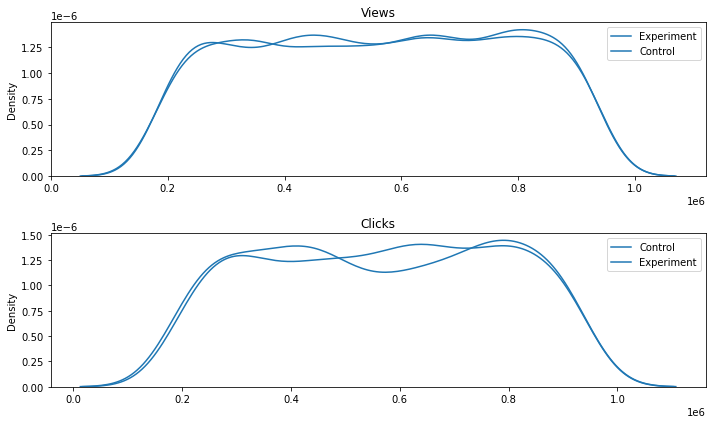

In [39]:
f, (ax0,ax1) = plt.subplots(nrows=2, figsize=(10,6))

# Views
ax0.set_title('Views')
sns.kdeplot(data=experiment_views, ax=ax0, label='Experiment')
sns.kdeplot(data=control_views , ax=ax0, label='Control')
ax0.legend()

# Clicks
ax1.set_title('Clicks')
sns.kdeplot(data=control_clicks, ax=ax1, color = "blue", label='Control')
sns.kdeplot(data=experiment_clicks, ax=ax1, color = "red", label='Experiment')
ax1.legend()

plt.tight_layout();

In [40]:
control_views = len(control_views)
control_clicks = len(control_clicks)
experiment_views = len(experiment_views)
experiment_clicks = len(experiment_clicks)

In [46]:
observations = np.array([experiment_clicks, experiment_views - experiment_clicks])
expectations = np.array([control_clicks, control_views - control_clicks])
print('OBSERVED (expermiment):', observations)
print('EXPECTED (control):', expectations)

OBSERVED (expermiment): [ 928 2068]
EXPECTED (control): [ 932 2400]


In [49]:
stats.chisquare(f_obs=observations, f_exp=expectations)


Power_divergenceResult(statistic=45.943834048640916, pvalue=1.2169234221091101e-11)

In [50]:
1.2169234221091101e-11/2

6.084617110545551e-12

In [ ]:
"""
With a p-value of almost 0, even divided by 2 to determine greater than, we can reject the null. The experiment group 
clicked on the homepage more than the control group.

"""

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [57]:
#Your code here
expected_ctr = control_clicks/control_views
expected_ctr * experiment_views

838.0168067226891

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [64]:
#Your code here
n = experiment_views
p = expected_ctr
var = n * p * (1-p)
std = np.sqrt(var)
std

24.568547907005815

In [69]:
z_score = (experiment_clicks - (expected_ctr * experiment_views))/std
z_score

3.6625360854823588

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [70]:
#Your code here
p_value = stats.norm.sf(z_score)
p_value

0.00012486528006951198

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: Our p-values are different between the two tests but they confirm the same conclusion:
We can reject the null hypothesis with an alpha of 0.01 or 0.05. The experimental homepage seems
to be getting more clicks than the old homepage.

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.